<a href="https://colab.research.google.com/github/jwillbailey/clarity/blob/main/notebooks/Installing_clarity_tools_and_using_metadata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Installing Clarity Enhancement Challenge Tools and Interacting with Metadata**

The clarity enhancement challenge tools can be found on the <a href="https://github.com/claritychallenge/clarity"> Clarity Challenges Github project</a> 
To begin, first clone the git repository. The default directory is named <code>clarity</code>.

Then run the installation shell commands found in the <a href="https://github.com/claritychallenge/clarity/blob/main/README.md">README.md</a> file.

In [ ]:
print('Cloning git repo...')
!git clone --quiet https://github.com/jwillbailey/clarity.git

print('Changing directory...')
%cd clarity

print('Installing requirements with pip...')
!pip install -qr requirements.txt
!more setup.py
print('Setting up toolkit modules...')
!pip install -e .
%cd /content/

---
In order to demonstrate basic functionality, a smaller demo dataset is available through the <code>demo_data</code> module. Running the following functions downloads different components of the datasets*:

  - <code>get_metadata_demo()</code>
  - <code>get_targets_demo()</code>
  - <code>get_interferers_demo()</code>
  - <code>get_rooms_demo()</code>
  - <code>get_scenes_demo()</code>

For this demonstration we will download and install just the metadata for the dataset

---
<small>
*Details on the content of the demo dataset and manual download instructions can be found in <a href="https://github.com/jwillbailey/clarity/blob/main/notebooks/Loading_demo_datasets.ipynb">this notebook</a> 
</small>

In [ ]:
import clarity
from clarity.notebooks import demo_data

demo_data.get_metadata_demo()

print('\n~/demo:')
!ls demo

print('\n~/demo/metadata:')
!ls demo/metadata

---
The clarity metadata is stored in JSON format. The python JSON library imports JSON files and parses them into a list of python dicts

In [63]:
import json

with open('demo/metadata/scenes.demo.json') as f:
  scenes = json.load(f)

with open('demo/metadata/rooms.demo.json') as f:
  rooms = json.load(f)

with open('demo/metadata/scenes_listeners.dev.json') as f:
  scenes_listeners = json.load(f)

with open('demo/metadata/listeners.json') as f:
  listeners = json.load(f)


---
We can now access the metadata using the dictionary's keys

In [85]:
print(scenes[0].keys())

dict_keys(['dataset', 'room', 'scene', 'target', 'duration', 'interferers', 'SNR', 'listener'])


It is then possible to access lists of metadata using list comprehensions and use these as any other data in python.

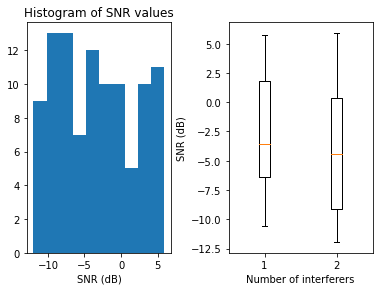

In [86]:
%matplotlib inline  
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,2)

#Get list of SNRs of scenes
snr_values = np.array([s['SNR'] for s in scenes], dtype = 'float32')

#Plot histogram
ax[0].hist(snr_values)
ax[0].set_title('Histogram of SNR values')
ax[0].set_xlabel('SNR (dB)')

#Get list of number of interferers in scenes
n_interferers = np.array([len(s['interferers']) for s in scenes], dtype = 'int32')

#Prepare data for boxplot
snr_comparison_data = [
                       [s for s, n in zip(snr_values, n_interferers) if n==2], 
                       [s for s, n in zip(snr_values, n_interferers) if n==3]
                       ]

#Plot boxplot
ax[1].boxplot(np.array(snr_comparison_data, dtype = 'object'))
ax[1].set_xlabel('Number of interferers')
ax[1].set_ylabel('SNR (dB)')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

fig.show()

---
The metadata is organised in such as way so that results from a query on one dict can, and in many cases should, be used to index another. For example information about the simulated room for a given scene can be retrieved using metadata retreived from a given scene entry 

dict_keys(['name', 'dimensions', 'target', 'listener', 'interferers'])

Scene number 32 with ID S06033 has room dimensions of 4.627x3.7x2.8

Simulated listeners for scene 32 have spatial attributes: 
{'position': [0.4, 2.4, 1.2], 'view_vector': [-0.447, -0.894, 0.0]}


Audiograms for listeners in Scene ID S06033


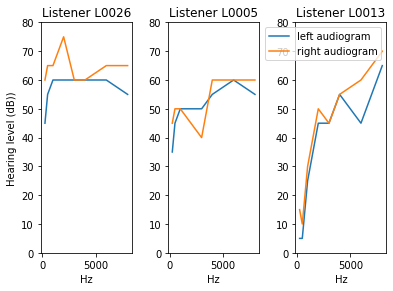

In [83]:
scene_no = 32

scene = scenes[scene_no]

room = [r for r in rooms if r['name'] == scene['room']]
current_listeners = scenes_listeners[scene["scene"]]

print(room[0].keys())

print(f'\nScene number {scene_no} with ID {scene["scene"]} has room dimensions of {room[0]["dimensions"]}')

print(f'\nSimulated listeners for scene {scene_no} have spatial attributes: \n{room[0]["listener"]}')

print(f'\n\nAudiograms for listeners in Scene ID {scene["scene"]}')


fig, ax = plt.subplots(1, len(current_listeners))

ax[0].set_ylabel('Hearing level (dB))')  
for i, l in enumerate(current_listeners):
  listener_data = listeners[l]
  left_ag, = ax[i].plot(listener_data['audiogram_cfs'], listener_data['audiogram_levels_l'], label = "left audiogram")
  right_ag, = ax[i].plot(listener_data['audiogram_cfs'], listener_data['audiogram_levels_r'], label = "right audiogram")
  ax[i].set_title(f'Listener {l}')
  ax[i].set_xlabel('Hz')
  ax[i].set_ylim([0,80])

plt.legend(handles=[left_ag, right_ag])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
